 Example.jl

 Test of LSTAR code used in "Carry Trade" paper.








 Paul.Soderlind@unisg.ch   18 January 2013, to Julia Nov 2015

In [1]:
using Statistics, Dates, DelimitedFiles, LinearAlgebra, Optim, ForwardDiff

include("jlFiles/FindNoNaNPs.jl")
include("jlFiles/NewEst3Ps.jl")
include("jlFiles/OlsPs.jl")
include("jlFiles/OlsLStar3Ps.jl")
include("jlFiles/printmat.jl")

printTable2

In [2]:
x     = readdlm("CTData.csv",',')      #date, FXV, Return_CT, SP, Ty

FXV   = x[:,2]                         #FX volatility
Re_CT = x[:,3]                         #carry trade return
SP    = x[:,4]                         #S&P return
Ty    = x[:,5]                         #treasury return

T = size(Re_CT,1)

gM = range(1,stop=4,length=15)
cM = range(-2,stop=3,length=21)

z = (FXV .- mean(FXV))/std(FXV);        #standardised regime variable

In [3]:
gcKeep = [NaN;NaN]                       #(gamma,c) set to NaN if estimated in NLS, otherwise imposed
#gcKeep = [3.0;NaN]                      #try to uncomment this to restrict gamma to 3
#gcKeep = [NaN;1.3]                      #or this


w = zeros(T,0)                           #no regressors without "regimes": empty vector
(theta,Stdtheta,fnOutput) = OlsLStar3Ps(Re_CT,[ones(T) SP Ty],w,true,z,gM,cM,gcKeep)

if all(isnan.(gcKeep))
  println("\n","theta is [g;c;b_low;b_high;(slopes without regimes, if any)]")
  rowNames = ["γ";"c";string.("b",1:3,"_L");string.("b",1:3,"_H")]
elseif isnan.(gcKeep) == [true;false]
  println("\n","theta is [g;b_low;b_high;(slopes without regimes, if any)]")
  rowNames = ["γ";string.("b",1:3,"_L"); string.("b",1:3,"_H")]
elseif isnan.(gcKeep) == [false;true]
  println("\n","theta is [c;b_low;b_high;(slopes without regimes, if any)]")
  rowNames = ["c";string.("b",1:3,"_L");string.("b",1:3,"_H")]
end

println("Estimates and t-stats")
printTable([theta Stdtheta],["coef","t-stat"],rowNames)

println("\n","difference of slope (b, high minus low state)")
printTable(fnOutput.slopeDiff,["coef","t-stat"],string.("b",1:3))


theta is [g;c;b_low;b_high;(slopes without regimes, if any)]
Estimates and t-stats
          coef    t-stat
γ        3.011     1.192
c        1.320     0.384
b1_L     0.000     0.000
b2_L     0.027     0.011
b3_L    -0.013     0.023
b1_H    -0.001     0.001
b2_H     0.178     0.042
b3_H    -0.192     0.234


difference of slope (b, high minus low state)
        coef    t-stat
b1    -0.002    -1.314
b2     0.151     3.353
b3    -0.179    -0.743



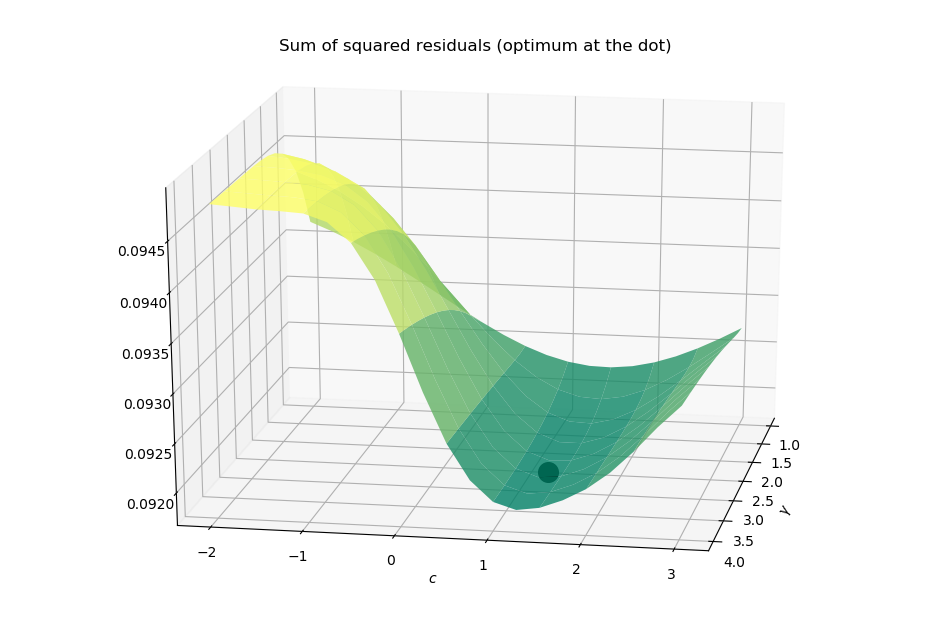

PyObject Text(-0.010995933701371372, -0.08083294219528303, '$c$')

In [4]:
#Plot of the loss function. Comment out this if you do not have PyPlot installed.
using PyPlot
PyPlot.svg(true)           #for ipynb notebooks

using3D()                   #active 3D plotting
fig = figure(figsize=(12,8))
ax = gca(projection="3d")
  surf(gM,cM,fnOutput.sseM',rstride=2,cstride=2,cmap=ColorMap("summer"),alpha=0.8)
  scatter(fnOutput.gcHat[1],fnOutput.gcHat[2],zs=minimum(fnOutput.sseM),s=200,color="k")
  ax.view_init(elev=20.0, azim=10)
  title("Sum of squared residuals (optimum at the dot)")
  xlabel(L"$\gamma$")
  ylabel(L"$c$")
  #display(gcf())          #uncomment in Atom/Juno

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*